
Sales Data Analysis and Exploration


In this project, you will try your hand at performing some data analysis on some data. Before that, you should also try to prepare the data as well as you can by doing some data cleaning and preparation. And finally, your analysis can be better captured in the form of some data visualizations.

First, let's import all the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# This line configures matplotlib to show figures embedded in the Jupyter notebook,
# instead of opening a new window for each figure.
%matplotlib inline

The data that we are going to use contains some sample sales data, and it is taken from [Kaggle](https://www.kaggle.com/kyanyoga/sample-sales-data). It's not a very big dataset, having only ~2,800 rows of data.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='windows-1252')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# Display basic statistics

df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
# Check for missing values
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.shape


(2823, 25)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
df.rename(columns={"PRICEEACH": "PRICE"}, inplace=True)
df


,ORDERNUMBER,QUANTITYORDERED,PRICE,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [10]:
# Grouping data by 'PRODUCTLINE'
grouped_productline = df.groupby('PRODUCTLINE')
grouped_productline

In [11]:
# Calculate total sales for each product line
total_sales_by_productline = grouped_productline['QUANTITYORDERED'].sum()
total_sales_by_productline

PRODUCTLINE
Classic Cars        33992
Motorcycles         11663
Planes              10727
Ships                8127
Trains               2712
Trucks and Buses    10777
Vintage Cars        21069
Name: QUANTITYORDERED, dtype: int64

In [15]:
# Calculate average price for each product line
average_price_by_productline = grouped_productline['PRICE'].mean()
average_price_by_productline

PRODUCTLINE
Classic Cars        87.335781
Motorcycles         82.997553
Planes              81.740915
Ships               83.855470
Trains              75.654675
Trucks and Buses    87.527940
Vintage Cars        78.148204
Name: PRICE, dtype: float64

In [16]:
# Count number of orders for each product line
num_orders_by_productline = grouped_productline.size()
num_orders_by_productline

PRODUCTLINE
Classic Cars        967
Motorcycles         331
Planes              306
Ships               234
Trains               77
Trucks and Buses    301
Vintage Cars        607
dtype: int64

In [17]:
# Display the results
print("Total Sales by Product Line:")
print(total_sales_by_productline)
print("\nAverage Price by Product Line:")
print(average_price_by_productline)
print("\nNumber of Orders by Product Line:")
print(num_orders_by_productline)

Total Sales by Product Line:
PRODUCTLINE
Classic Cars        33992
Motorcycles         11663
Planes              10727
Ships                8127
Trains               2712
Trucks and Buses    10777
Vintage Cars        21069
Name: QUANTITYORDERED, dtype: int64

Average Price by Product Line:
PRODUCTLINE
Classic Cars        87.335781
Motorcycles         82.997553
Planes              81.740915
Ships               83.855470
Trains              75.654675
Trucks and Buses    87.527940
Vintage Cars        78.148204
Name: PRICE, dtype: float64

Number of Orders by Product Line:
PRODUCTLINE
Classic Cars        967
Motorcycles         331
Planes              306
Ships               234
Trains               77
Trucks and Buses    301
Vintage Cars        607
dtype: int64


Here are some questions that you would be interested to uncover when you perform an exploratory data analysis (or 'EDA' in short) on some sample data.

1. Identify **where** customers are coming from.

2. Find out their **yearly retail performance** (in terms of total revenue).

3. What **product categories** are the most and least popular?

4. Who are their **most valuable customers** (basically we define this as those who purchased the most from them) ?

Feel free to refine these questions in more detailed (if you wish), or define other interesting questions that you want to find out from this data.

There are some interesting "catches" to consider as well. For example, the 'Status' for most entries are mostly "Shipped", but there are other statuses, i.e. "In Process", "Disputed", "Cancelled", etc. It is up to you to define which of these entries (based on their statuses) that should be considered in your analysis and which should be left out.


*Note: You can do your prototyping here (and transfer relevant lines of code to your source file later), or directly work on the source file using Spyder.*

In [18]:
# 1. Identify **where** customers are coming from.

customer_source = df.groupby('CUSTOMERNAME')['CITY'].value_counts().reset_index(name='counts')
customer_source = customer_source.sort_values(by=['CUSTOMERNAME', 'counts'], ascending=False)
print(customer_source)

                   CUSTOMERNAME          CITY  counts
91            giftsbymail.co.uk         Cowes      26
90  West Coast Collectables Co.       Burbank      13
89     Volvo Model Replicas, Co          Lule      19
88              Vitachrome Inc.           NYC      25
87              Vida Sport, Ltd        Gensve      31
..                          ...           ...     ...
4             Atelier graphique        Nantes       7
3       Anna's Decorations, Ltd  North Sydney      46
2            Amica Models & Co.        Torino      26
1                  Alpha Cognac      Toulouse      20
0                AV Stores, Co.    Manchester      51

[92 rows x 3 columns]


In [19]:
customer_locations = df.groupby('COUNTRY')['CUSTOMERNAME'].nunique()
print("Customer locations:")
print(customer_locations)

Customer locations:
COUNTRY
Australia       5
Austria         2
Belgium         2
Canada          3
Denmark         2
Finland         3
France         12
Germany         3
Ireland         1
Italy           3
Japan           2
Norway          3
Philippines     1
Singapore       2
Spain           5
Sweden          2
Switzerland     1
UK              5
USA            35
Name: CUSTOMERNAME, dtype: int64


In [20]:
# 2. Find out their **yearly retail performance** (in terms of total revenue).

df['ORDERNUMBER'] = pd.to_datetime(df['ORDERNUMBER'])
df['YEAR_ID'] = df['ORDERNUMBER'].dt.year
yearly_revenue = df.groupby('YEAR_ID')['SALES'].sum()
print("\nYearly retail performance (total revenue):")
print(yearly_revenue)



Yearly retail performance (total revenue):
YEAR_ID
1970    10032628.85
Name: SALES, dtype: float64


In [21]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['YEAR'] = df['ORDERDATE'].dt.year
yearly_revenue = df.groupby('YEAR')['SALES'].sum()
print("\nYearly retail performance (total revenue):")
print(yearly_revenue)


Yearly retail performance (total revenue):
YEAR
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64


<ipython-input-22-3dbed91567bc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR_ID', y='SALES', data=yearly_revenue, palette='viridis')


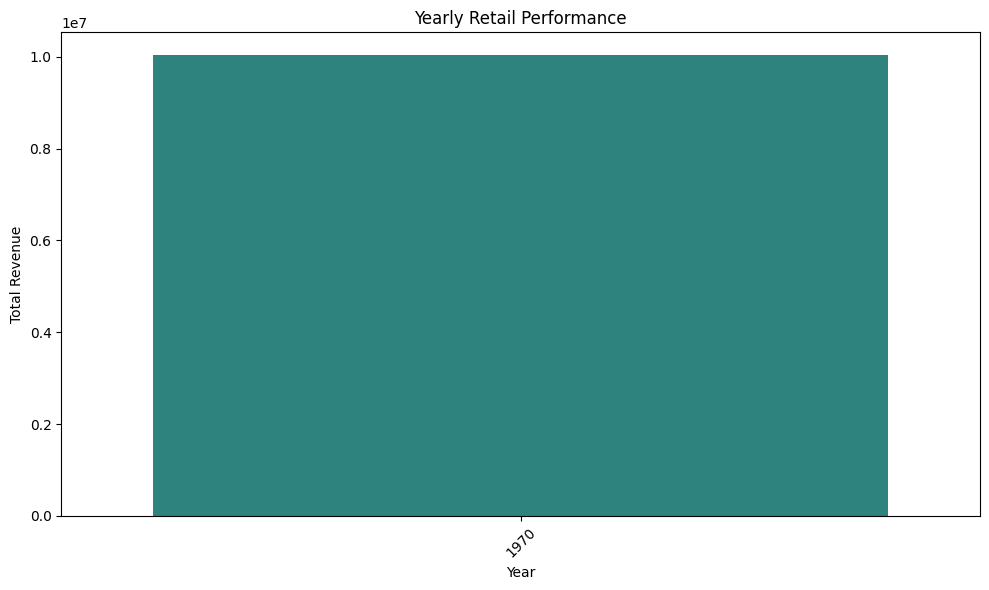

In [22]:
# Extract relevant columns for analysis
sales_yearly = df[['SALES', 'YEAR_ID']]

# Group data by year and calculate total revenue for each year
yearly_revenue = sales_yearly.groupby('YEAR_ID').sum()

# Reset index to make 'YEAR_ID' a column instead of index
yearly_revenue.reset_index(inplace=True)

# Plotting using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR_ID', y='SALES', data=yearly_revenue, palette='viridis')
plt.title('Yearly Retail Performance')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [23]:
#Grouping data by 'YEAR_ID' and 'PRODUCTLINE' and calculating total sales for each combination
total_sales_by_year_product = df.groupby(['YEAR_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()

# Plotting the yearly retail performance with color-coded product categories
fig = px.bar(total_sales_by_year_product, x='YEAR_ID', y='SALES',
             title='Yearly Retail Performance by Product Category',
             labels={'YEAR_ID': 'Year', 'SALES': 'Total Revenue'},
             color='PRODUCTLINE',  # Adding color based on product category
             barmode='group')  # Displaying bars for different product categories side by side

fig.show()

In [24]:
# 3. What **product categories** are the most and least popular?

popular_categories = df['PRODUCTLINE'].value_counts().idxmax()
least_popular_categories = df['PRODUCTLINE'].value_counts().idxmin()
print("\nMost popular product category:", popular_categories)
print("Least popular product category:", least_popular_categories)


Most popular product category: Classic Cars
Least popular product category: Trains


<ipython-input-25-f6c3bf5fa18f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




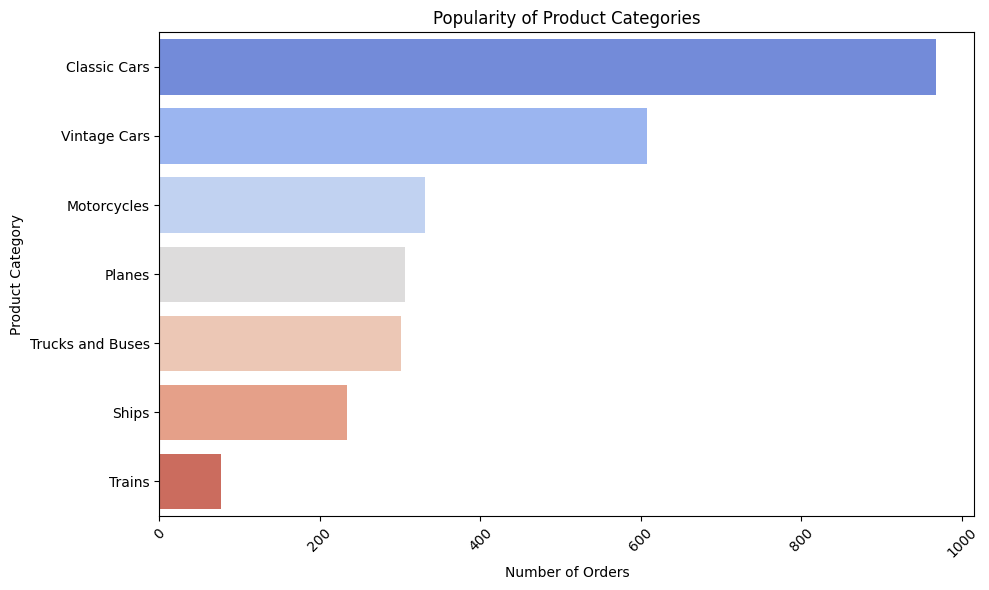

Most popular product category: Classic Cars
Least popular product category: Trains


In [25]:
# Count the frequency of each product category
product_category_counts = df['PRODUCTLINE'].value_counts()

# Plotting using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_counts.values, y=product_category_counts.index, palette='coolwarm')
plt.title('Popularity of Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the most and least popular product categories
most_popular_category = product_category_counts.idxmax()
least_popular_category = product_category_counts.idxmin()

print("Most popular product category:", most_popular_category)
print("Least popular product category:", least_popular_category)

In [26]:
# Grouping data by 'PRODUCTLINE' and calculating total sales for each product line
total_sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

# Sorting product categories by total sales in descending order
total_sales_by_productline = total_sales_by_productline.sort_values(by='SALES', ascending=False)

# Plotting the total sales by product category using Plotly Express with color
fig = px.bar(total_sales_by_productline, x='PRODUCTLINE', y='SALES',
             title='Total Sales by Product Category',
             labels={'PRODUCTLINE': 'Product Category', 'SALES': 'Total Sales'},
             color='PRODUCTLINE')  # Adding color based on product category

fig.show()


In [27]:
# 4. Who are their **most valuable customers** (basically we define this as those who purchased the most from them) ?

most_valuable_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().nlargest(10)
print("\nMost valuable customers:")
print(most_valuable_customers)


Most valuable customers:
CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64


In [29]:
# Grouping data by 'CUSTOMERNAME' and calculating total sales for each customer
customer_sales = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()

# Sorting customers by total sales in descending order
customer_sales = customer_sales.sort_values(by='SALES', ascending=False)

# Selecting top 20 most valuable customers
top_customers = customer_sales.head(20)

# Plotting a donut chart using Plotly Express
fig = px.pie(top_customers, values='SALES', names='CUSTOMERNAME', hole=0.5)
fig.update_traces(textinfo='percent+label', pull=0.05)
fig.update_layout(title='Most Valuable Customers (Top 20)')
fig.show()